In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [3]:
path = "src\wheather_data\TG_STAID000001.txt"

In [7]:
df = pd.read_csv(path, skiprows=20)
df.head()

,STAID,SOUID,DATE,TG,Q_TG
0,10,30,17560101,-87,1
1,10,30,17560102,-92,1
2,10,30,17560103,-86,1
3,10,30,17560104,-77,1
4,10,30,17560105,-72,1


In [11]:
df.shape

(42878, 5)

## Feature Engineering

In [9]:
df.describe()

,STAID,SOUID,DATE,TG,Q_TG
count,42878.0,42878.0,42878,42878.000000,42878.000000
mean,1.0,35381.0,1918-09-12 12:00:00,40.056346,0.204371
min,1.0,35381.0,1860-01-01 00:00:00,-9999.000000,0.000000
25%,1.0,35381.0,1889-05-07 06:00:00,5.000000,0.000000
50%,1.0,35381.0,1918-09-12 12:00:00,59.000000,0.000000
75%,1.0,35381.0,1948-01-17 18:00:00,128.000000,0.000000
max,1.0,35381.0,1977-05-24 00:00:00,262.000000,9.000000
std,0.0,0.0,NaN,481.776385,0.569045


#### Delete outlier data

In [14]:
df.loc[df["TG"] == -9999]["TG"].count()

np.int64(96)

In [15]:
df = df.loc[df["TG"] != -9999]
df.shape

(42782, 5)

#### Adjust TG column by dived by 10

In [18]:
df["TG"] = df["TG"] / 10

In [19]:
df.describe()

,STAID,SOUID,DATE,TG,Q_TG
count,42782.0,42782.0,42782,42782.000000,42782.000000
mean,1.0,35381.0,1918-10-25 08:26:23.993268224,6.258333,0.184634
min,1.0,35381.0,1860-01-01 00:00:00,-28.800000,0.000000
25%,1.0,35381.0,1889-07-13 06:00:00,0.600000,0.000000
50%,1.0,35381.0,1918-10-30 12:00:00,5.900000,0.000000
75%,1.0,35381.0,1948-02-10 18:00:00,12.800000,0.000000
max,1.0,35381.0,1977-05-24 00:00:00,26.200000,1.000000
std,0.0,0.0,NaN,7.724580,0.388005


## Data Visualization

<Axes: >

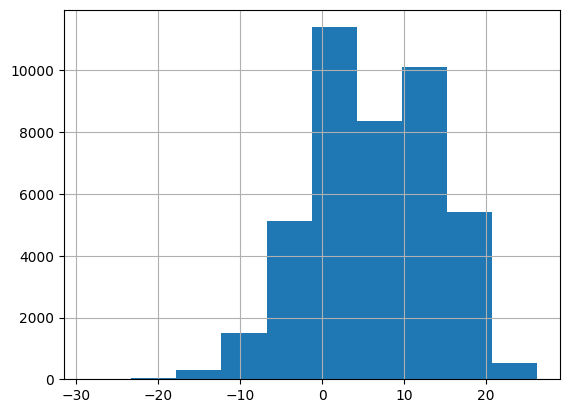

In [20]:
df["TG"].hist()

Text(0.5, 1.0, 'Time Series Temperature')

<Figure size 1500x300 with 0 Axes>

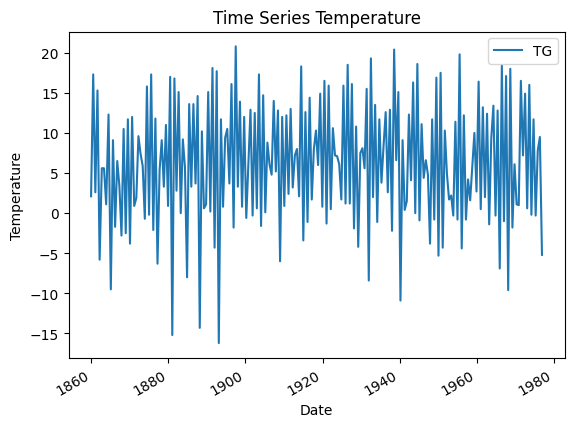

In [32]:
plt.figure(figsize=(15,3))
df[::200].plot(x="DATE", y="TG")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Time Series Temperature")